# Banking Project

### Part 1: Generating the Data
**This section will cover the creation of synthetic data.**

In [3]:
import random
import faker
import pandas as pd
from datetime import datetime, timedelta
from IPython.display import display

# Initialize a Faker generator
fake = faker.Faker()

# Helper function to generate random dates within a range


def random_date(start, end):
    return start + timedelta(
        seconds=random.randint(0, int((end - start).total_seconds())))

# Generate synthetic data based on the structure provided


def generate_synthetic_data(num_entries=2500):
    customers = []
    accounts = []
    transactions = []
    loans = []
    credit_cards = []

    for _ in range(num_entries):
        # Customer Information & Account Information
        customer_id = fake.unique.uuid4()
        account_number = fake.unique.random_number(digits=10)
        customers.append({
            "CustomerID": customer_id,
            "Age": random.randint(18, 70),
            "Gender": random.choice(["Male", "Female", "Other"]),
            "Occupation": fake.job(),
            "EducationLevel": random.choice(["High School", "Bachelor", "Master", "PhD"]),
            "MaritalStatus": random.choice(["Single", "Married", "Divorced", "Widowed"])
        })

        accounts.append({
            "CustomerID": customer_id,
            "AccountNumber": account_number,
            "AccountType": random.choice(["Checking", "Savings", "Credit Card", "Loan"]),
            "DateAccountOpened": random_date(datetime(2000, 1, 1), datetime(2023, 1, 1)).date(),
            "AccountStatus": random.choice(["Active", "Closed", "Suspended"])
        })

        # Transaction Details
        transactions.append({
            # "Customer ID": customer_id,
            "TransactionID": fake.unique.random_number(digits=8),
            "AccountNumber": account_number,
            "DateofTransaction": random_date(datetime(2020, 1, 1), datetime(2023, 4, 1)).date(),
            "TypeofTransaction": random.choice(["Deposit", "Withdrawal", "Payment", "Transfer"]),
            "Amount": round(random.uniform(100, 10000), 2),
            "TransactionDescription": fake.sentence()
        })

        # Loan Information
        loans.append({
            # "Customer ID": customer_id,
            "LoanID": fake.unique.random_number(digits=8),
            "AccountNumber": account_number,
            "LoanAmount": random.randint(5000, 50000),
            "LoanStartDate": random_date(datetime(2010, 1, 1), datetime(2023, 1, 1)).date(),
            "LoanType": random.choice(["Mortgage", "Personal", "Auto"]),
            "InterestRate": round(random.uniform(1.5, 10.0), 2),
            "LoanTerm": random.choice([10, 15, 20, 25, 30]),
            "MonthlyRepaymentAmount": random.randint(200, 2000)
        })

        # Credit Card Information
        credit_cards.append({
            # "Customer ID": customer_id,
            "CardNumber": fake.unique.credit_card_number(card_type=None),
            "AccountNumber": account_number,
            "CreditLimit": random.randint(1000, 10000),
            "CardType": random.choice(["Visa", "MasterCard", "AMEX"]),
            "ExpiryDate": random_date(datetime.now(), datetime(2030, 1, 1)).date(),
            "CVV": fake.credit_card_security_code(card_type=None)
        })

    # Convert lists to DataFrames
    df_customers = pd.DataFrame(customers)
    df_accounts = pd.DataFrame(accounts)
    df_transactions = pd.DataFrame(transactions)
    df_loans = pd.DataFrame(loans)
    df_credit_cards = pd.DataFrame(credit_cards)

    # Save DataFrames to CSV files
    df_customers.to_csv(
        '/workspaces/ImplementingStatisticsWithPython/chapter11project/banking/data/customers.csv', index=False)
    df_accounts.to_csv(
        '/workspaces/ImplementingStatisticsWithPython/chapter11project/banking/data/accounts.csv', index=False)
    df_transactions.to_csv(
        '/workspaces/ImplementingStatisticsWithPython/chapter11project/banking/data/transactions.csv', index=False)
    df_loans.to_csv(
        '/workspaces/ImplementingStatisticsWithPython/chapter11project/banking/data/loans.csv', index=False)
    df_credit_cards.to_csv(
        '/workspaces/ImplementingStatisticsWithPython/chapter11project/banking/data/credit_cards.csv', index=False)

    return df_customers, df_accounts, df_transactions, df_loans, df_credit_cards


# Generate and save synthetic data
dataframes = generate_synthetic_data()

# Optionally, print a sample from each DataFrame to view the data
for df in dataframes:
    display(df.head())

,CustomerID,Age,Gender,Occupation,EducationLevel,MaritalStatus
0,e9075d33-4774-4396-8c15-fcf805459c96,35,Female,"Research officer, political party",High School,Married
1,9bcfa591-d8e9-4a38-871f-64ded25fd346,54,Female,Bookseller,High School,Widowed
2,80edf1fe-4950-4944-ac3a-35372bdd3721,46,Other,Operations geologist,PhD,Widowed
3,3543a34e-3cb8-4fa1-b83a-4408596c50eb,42,Female,English as a second language teacher,High School,Married
4,a101f6ed-a57c-4394-a17d-ceff2481732e,31,Male,Ranger/warden,PhD,Married


,CustomerID,AccountNumber,AccountType,DateAccountOpened,AccountStatus
0,e9075d33-4774-4396-8c15-fcf805459c96,1141148848,Loan,2008-08-25,Closed
1,9bcfa591-d8e9-4a38-871f-64ded25fd346,5241226745,Savings,2002-02-05,Active
2,80edf1fe-4950-4944-ac3a-35372bdd3721,6361638632,Savings,2016-06-17,Active
3,3543a34e-3cb8-4fa1-b83a-4408596c50eb,2049494185,Checking,2011-01-10,Closed
4,a101f6ed-a57c-4394-a17d-ceff2481732e,5816568765,Credit Card,2014-04-09,Active


,TransactionID,AccountNumber,DateofTransaction,TypeofTransaction,Amount,TransactionDescription
0,95984544,1141148848,2020-12-11,Payment,4183.62,Civil feeling TV out firm nearly.
1,76250421,5241226745,2020-04-04,Withdrawal,9949.41,Than Congress difference TV enter.
2,15986176,6361638632,2023-01-17,Deposit,3535.63,Keep enjoy think such would should.
3,2001327,2049494185,2020-07-06,Payment,9510.84,Five sound nation matter budget public expert.
4,6790879,5816568765,2020-06-08,Deposit,2798.73,Guy option pretty fill.


,LoanID,AccountNumber,LoanAmount,LoanStartDate,LoanType,InterestRate,LoanTerm,MonthlyRepaymentAmount
0,37715413,1141148848,34395,2011-05-03,Mortgage,9.96,30,1314
1,56644524,5241226745,22448,2020-03-08,Personal,9.95,10,774
2,45464098,6361638632,40165,2012-11-27,Personal,7.30,15,874
3,96753284,2049494185,20742,2012-11-18,Mortgage,5.12,10,367
4,93482473,5816568765,37452,2011-02-06,Auto,1.85,25,1881


,CardNumber,AccountNumber,CreditLimit,CardType,ExpiryDate,CVV
0,4443133733300210,1141148848,6900,MasterCard,2025-11-14,416
1,501870184543,5241226745,4157,MasterCard,2028-08-20,125
2,4182801338641213,6361638632,9684,AMEX,2027-09-07,508
3,4245763186558276,2049494185,3226,AMEX,2024-04-25,758
4,3540517730379439,5816568765,2348,Visa,2027-02-22,983


### Part 2: Exploratory Data Analysis (EDA)
**Here, we will examine the data to understand distributions and relationships.**

,CustomerID,Age,Gender,Occupation,EducationLevel,MaritalStatus
0,e9075d33-4774-4396-8c15-fcf805459c96,35,Female,"Research officer, political party",High School,Married
1,9bcfa591-d8e9-4a38-871f-64ded25fd346,54,Female,Bookseller,High School,Widowed
2,80edf1fe-4950-4944-ac3a-35372bdd3721,46,Other,Operations geologist,PhD,Widowed
3,3543a34e-3cb8-4fa1-b83a-4408596c50eb,42,Female,English as a second language teacher,High School,Married
4,a101f6ed-a57c-4394-a17d-ceff2481732e,31,Male,Ranger/warden,PhD,Married


CustomerID        0
Age               0
Gender            0
Occupation        0
EducationLevel    0
MaritalStatus     0
dtype: int64


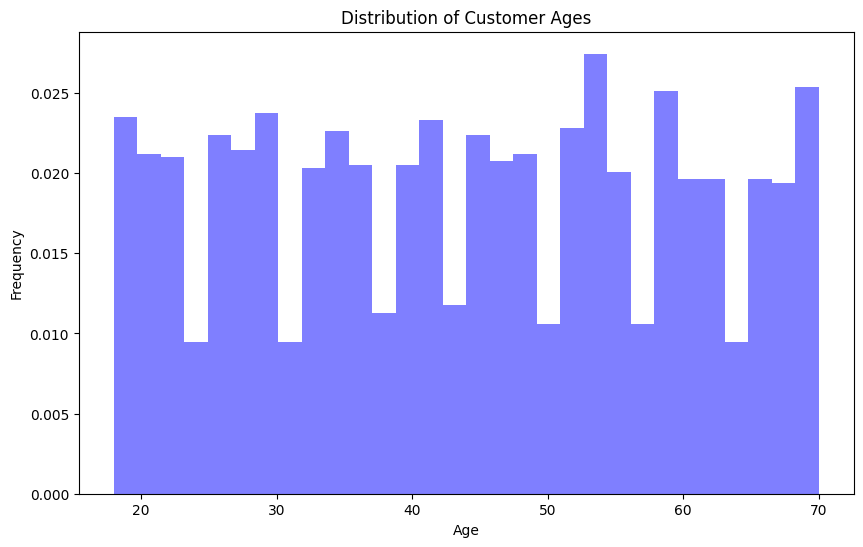

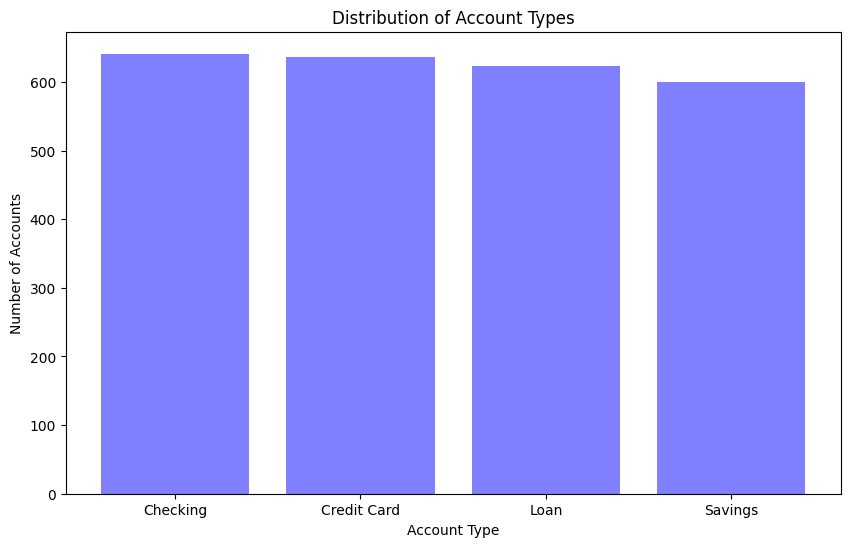

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Load data from CSV files
customers = pd.read_csv(
    '/workspaces/ImplementingStatisticsWithPython/chapter11project/banking/data/customers.csv')
accounts = pd.read_csv(
    '/workspaces/ImplementingStatisticsWithPython/chapter11project/banking/data/accounts.csv')
# transactions = pd.read_csv(
#     '/workspaces/ImplementingStatisticsWithPython/chapter11project/banking/data/transactions.csv')
# loans = pd.read_csv(
#     '/workspaces/ImplementingStatisticsWithPython/chapter11project/banking/data/loans.csv')
# credit_cards = pd.read_csv(
#     '/workspaces/ImplementingStatisticsWithPython/chapter11project/banking/data/credit_cards.csv')

# Viewing the first few rows of the customer data and check if there are NaN
display(customers.head())
print(customers.isna().sum())

# Plotting the age distribution of customers
plt.figure(figsize=(10, 6))
plt.hist(customers['Age'], bins=30, density=True, alpha=0.5, color='blue')
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Analyzing account types
account_types = accounts['AccountType'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(account_types.index, account_types.values, alpha=0.5, color='blue')
plt.title('Distribution of Account Types')
plt.xlabel('Account Type')
plt.ylabel('Number of Accounts')
plt.show()

### Part 3: Statistical Testing
**We'll perform statistical tests to examine hypotheses, such as differences in account types based on education level.**

In [7]:
import pandas as pd
from scipy.stats import chi2_contingency

# Creating a contingency table of account type by education level
contingency_table = pd.crosstab(
    accounts['AccountType'], customers['EducationLevel'])

# Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Printing results with labels for better readability
print("Chi-squared Test results:")
print(f"P-value: {p}")
print("\nExpected Frequencies:")
# Creating a DataFrame for expected frequencies with proper labels for easy understanding
expected_df = pd.DataFrame(expected,
                           index=contingency_table.index,
                           columns=contingency_table.columns)
print(expected_df)

Chi-squared Test results:
P-value: 0.4305390810908167

Expected Frequencies:
EducationLevel  Bachelor  High School    Master      PhD
AccountType                                             
Checking        162.3012      162.814  151.7888  164.096
Credit Card     161.0352      161.544  150.6048  162.816
Loan            157.7436      158.242  147.5264  159.488
Savings         151.9200      152.400  142.0800  153.600


### Part 4: Analyze the credit card risk 
**To create a comprehensive dataset that includes various attributes from different CSV files and categorizing credit card risk into High, Medium, and Low based on several factors. We'll Anlyze the credit card risk based on `EducationLevel`, `MaritalStatus`, `AccountType`, `LoanType`, `InterestRate`, `CreditLimit`**

1. Interest Rate: High Risk if the interest rate are high
2. Credit limit: High Risk if the credit limit is high
3. Education Level: Higher educational levels might correlate with lower risk.
4. Marital Status: Married individuals might be considered lower risk compared to single ones.
5. Account Type: Certain account types like loans might carry higher risk than others like savings.
6. Loan Amount: Larger loan amounts could be considered higher risk.

In [9]:
customers = pd.read_csv(
    '/workspaces/ImplementingStatisticsWithPython/chapter11project/banking/data/customers.csv')
accounts = pd.read_csv(
    '/workspaces/ImplementingStatisticsWithPython/chapter11project/banking/data/accounts.csv')
loans = pd.read_csv(
    '/workspaces/ImplementingStatisticsWithPython/chapter11project/banking/data/loans.csv')
credit_cards = pd.read_csv(
    '/workspaces/ImplementingStatisticsWithPython/chapter11project/banking/data/credit_cards.csv')

# Merge customers with accounts
customer_accounts = pd.merge(customers, accounts, on='CustomerID', how='inner')
# Merge the above result with loans
customer_accounts_loans = pd.merge(
    customer_accounts, loans, on='AccountNumber', how='inner')

# Merge the complete data with credit cards
complete_data = pd.merge(customer_accounts_loans,
                         credit_cards, on='AccountNumber', how='inner')

# Function to categorize credit card risk, using the conditions


def categorize_risk(row):
    # Base risk score initialization
    risk_score = 0

    # Credit Limit and Interest Rate Conditions
    if row['CreditLimit'] > 7000 or row['InterestRate'] > 7:
        risk_score += 3
    elif 5000 < row['CreditLimit'] <= 7000 or 5 < row['InterestRate'] <= 7:
        risk_score += 2
    else:
        risk_score += 1

    # Education Level Condition
    if row['EducationLevel'] in ['PhD', 'Master']:
        risk_score -= 1  # Lower risk if higher education
    elif row['EducationLevel'] in ['High School']:
        risk_score += 1  # Higher risk if lower education

    # Marital Status Condition
    if row['MaritalStatus'] == 'Married':
        risk_score -= 1
    elif row['MaritalStatus'] in ['Single', 'Divorced', 'Widowed']:
        risk_score += 1

    # Account Type Condition
    if row['AccountType'] in ['Loan', 'Credit Card']:
        risk_score += 2
    elif row['AccountType'] in ['Savings', 'Checking']:
        risk_score -= 1

    # Loan Amount Condition
    if row['LoanAmount'] > 20000:
        risk_score += 2
    elif row['LoanAmount'] <= 5000:
        risk_score -= 1

    # Categorize risk based on final risk score
    if risk_score >= 5:
        return 'High'
    elif 3 <= risk_score < 5:
        return 'Medium'
    else:
        return 'Low'


# Apply the function to determine credit card risk type
complete_data['credit_cards_risk_type'] = complete_data.apply(
    categorize_risk, axis=1)

# Select the relevant columns
credit_cards_risk = complete_data[['CustomerID', 'EducationLevel', 'MaritalStatus',
                                   'AccountType', 'LoanAmount', 'InterestRate', 'CreditLimit', 'credit_cards_risk_type']]

# Save the DataFrame to a new CSV file
credit_cards_risk.to_csv('credit_cards_risk.csv', index=False)

print("DataFrame saved as 'credit_cards_risk.csv'. Here's a preview:")
display(credit_cards_risk.head())

DataFrame saved as 'credit_cards_risk.csv'. Here's a preview:


,CustomerID,EducationLevel,MaritalStatus,AccountType,LoanAmount,InterestRate,CreditLimit,credit_cards_risk_type
0,e9075d33-4774-4396-8c15-fcf805459c96,High School,Married,Loan,34395,9.96,6900,High
1,9bcfa591-d8e9-4a38-871f-64ded25fd346,High School,Widowed,Savings,22448,9.95,4157,High
2,80edf1fe-4950-4944-ac3a-35372bdd3721,PhD,Widowed,Savings,40165,7.30,9684,Medium
3,3543a34e-3cb8-4fa1-b83a-4408596c50eb,High School,Married,Checking,20742,5.12,3226,Medium
4,a101f6ed-a57c-4394-a17d-ceff2481732e,PhD,Married,Credit Card,37452,1.85,2348,Medium


### Part 5: Predictive Modeling
**We'll use regression to predict credit limits and classification to identify high-risk accounts. Before applying it we will encode categorical into into numbers**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# Load data : EducationLevel MaritalStatus AccountType Amount LoanType InterestRate CreditLimit
credit_cards = pd.read_csv('credit_cards_risk.csv')
display(credit_cards.head())

# Mapping dictionaries for each categorical column
education_levels = {"High School": 0, "Bachelor": 1, "Master": 2, "PhD": 3}
marital_status = {"Single": 0, "Married": 1, "Divorced": 2, "Widowed": 3}
account_types = {"Checking": 0, "Savings": 1, "Credit Card": 2, "Loan": 3}
risk_types = {"Low": 0, "Medium": 1, "High": 2}

# Apply the mapping to the respective columns
credit_cards['EducationLevel'] = credit_cards['EducationLevel'].map(
    education_levels)
credit_cards['MaritalStatus'] = credit_cards['MaritalStatus'].map(
    marital_status)
credit_cards['AccountType'] = credit_cards['AccountType'].map(account_types)
credit_cards['credit_cards_risk_type'] = credit_cards['credit_cards_risk_type'].map(
    risk_types)
display(credit_cards.head())

# Prepare data for logistic regression
X = credit_cards[['EducationLevel', 'MaritalStatus', 'AccountType',
                  'LoanAmount', 'InterestRate', 'CreditLimit']]  # Predictor
y = credit_cards['credit_cards_risk_type']  # Response variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

,CustomerID,EducationLevel,MaritalStatus,AccountType,LoanAmount,InterestRate,CreditLimit,credit_cards_risk_type
0,e9075d33-4774-4396-8c15-fcf805459c96,High School,Married,Loan,34395,9.96,6900,High
1,9bcfa591-d8e9-4a38-871f-64ded25fd346,High School,Widowed,Savings,22448,9.95,4157,High
2,80edf1fe-4950-4944-ac3a-35372bdd3721,PhD,Widowed,Savings,40165,7.30,9684,Medium
3,3543a34e-3cb8-4fa1-b83a-4408596c50eb,High School,Married,Checking,20742,5.12,3226,Medium
4,a101f6ed-a57c-4394-a17d-ceff2481732e,PhD,Married,Credit Card,37452,1.85,2348,Medium


,CustomerID,EducationLevel,MaritalStatus,AccountType,LoanAmount,InterestRate,CreditLimit,credit_cards_risk_type
0,e9075d33-4774-4396-8c15-fcf805459c96,0,1,3,34395,9.96,6900,2
1,9bcfa591-d8e9-4a38-871f-64ded25fd346,0,3,1,22448,9.95,4157,2
2,80edf1fe-4950-4944-ac3a-35372bdd3721,3,3,1,40165,7.30,9684,1
3,3543a34e-3cb8-4fa1-b83a-4408596c50eb,0,1,0,20742,5.12,3226,1
4,a101f6ed-a57c-4394-a17d-ceff2481732e,3,1,2,37452,1.85,2348,1


              precision    recall  f1-score   support

           0       0.73      0.30      0.43       115
           1       0.47      0.54      0.51       149
           2       0.73      0.86      0.79       236

    accuracy                           0.64       500
   macro avg       0.64      0.57      0.57       500
weighted avg       0.65      0.64      0.62       500



## Part 6: Use the trained Predictive Model to take user input and see predictions
**We'll take `EducationLevel`, `MaritalStatus`, `AccountType`, `LoanType`, `InterestRate`, `CreditLimit` as user input using drop down selection to view the prediciton `credit_cards_risk_type` as High, Low, Meduim**

In [11]:
# Define mappings for categorical input to integer encoding
education_levels = {"High School": 0, "Bachelor": 1, "Master": 2, "PhD": 3}
marital_status = {"Single": 0, "Married": 1, "Divorced": 2, "Widowed": 3}
account_types = {"Checking": 0, "Savings": 1, "Credit Card": 2, "Loan": 3}
risk_type_options = {0: 'Low', 1: 'Medium', 2: 'High'}

# Function to get user input and convert to encoded value


def get_user_input(prompt, category_dict):
    while True:
        response = input(prompt)
        if response in category_dict:
            return category_dict[response]
        else:
            print("Invalid entry. Please choose one of:",
                  list(category_dict.keys()))

# Function to get numerical input and validate it


def get_numerical_input(prompt):
    while True:
        try:
            value = float(input(prompt))
            return value
        except ValueError:
            print("Invalid entry. Please enter a valid number.")


# Collect inputs
education_level = get_user_input(
    "Enter Education Level (High School, Bachelor, Master, PhD): ", education_levels)
marital_status = get_user_input(
    "Enter Marital Status (Single, Married, Divorced, Widowed): ", marital_status)
account_type = get_user_input(
    "Enter Account Type (Checking, Savings, Credit Card, Loan): ", account_types)
loan_amount = get_numerical_input("Enter Loan Amount: ")
interest_rate = get_numerical_input("Enter Interest Rate: ")
credit_limit = get_numerical_input("Enter Credit Limit: ")

# Prepare the input data for prediction
input_data = pd.DataFrame({
    'EducationLevel': [education_level],
    'MaritalStatus': [marital_status],
    'AccountType': [account_type],
    'LoanAmount': [loan_amount],
    'InterestRate': [interest_rate],
    'CreditLimit': [credit_limit]
})

# Predict the risk type
prediction = model.predict(input_data)
print("Predicted Risk Type:", risk_type_options[prediction[0]])

Predicted Risk Type: Low
